Deep Learning with Keras and Tensorflow

In [1]:
import numpy as np
import pandas as pd


In [2]:
df_diab=pd.read_csv('diabetes.csv')


In [3]:
df_diab.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [4]:
df_diab.Outcome.unique()

array([1, 0])

In [5]:
df_diab.isna().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df_diab.shape

(768, 9)

In [7]:
X=df_diab.drop(['Outcome'],axis=1)
y=df_diab[['Outcome']]


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12345)


In [10]:
X_train.shape

(614, 8)

In [11]:
X_test.shape

(154, 8)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [14]:
import tensorflow as tf


In [15]:
from tensorflow.keras.models import Sequential

In [16]:
from tensorflow.keras.layers import Dense # Dense is fully connected Neural Network


In [17]:
model=Sequential()

In [18]:
X_train_scaled.shape[1]

8

In [19]:
# From Here Architecture will start for the Neural Network
# First Hidden Network
model.add(Dense(units=128,activation='relu',
                input_shape=(X_train_scaled.shape[1],)))

In [20]:
# Second Hidden Layer 64 nerons and Relu Activation function
model.add(Dense(units=64,activation='relu'))

# Third Hidden Layer with 32 neurons and activation function as relu
model.add(Dense(units=32,activation='relu'))

# output Layer with Sigmoid function
model.add(Dense(units=1,activation='sigmoid'))


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Here 8 feature and 1 bias   so 9 as Feature i.e input layer neurons 
# 128 neurons for the first Hidden layer
9*128

1152

In [23]:
# dense (Dense)               (None, 128)               1152      

In [24]:
model.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy'])

In [25]:
result=model.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
20/20 [==============================] - 1s 1ms/step - loss: 0.6414 - accuracy: 0.6922
Epoch 2/100
20/20 [==============================] - 0s 1ms/step - loss: 0.5382 - accuracy: 0.7638
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4808 - accuracy: 0.7671
Epoch 4/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4639 - accuracy: 0.7850
Epoch 5/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4555 - accuracy: 0.7720
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4424 - accuracy: 0.7785
Epoch 7/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4336 - accuracy: 0.7834
Epoch 8/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4280 - accuracy: 0.7899
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4258 - accuracy: 0.7883
Epoch 10/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4134 - accuracy: 0.8046
Epoch 11/

In [26]:
# Here 20 /20  is  giving as batch of the data set 
y_train_pred=model.predict(X_train_scaled)
y_test_pred=model.predict(X_test_scaled)

In [27]:
# Xtrain.shape[0]  is 614   which will divide into 20 batches 
614/32

19.1875

In [28]:
# So 20 /20 Batches are providing by the model


In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [30]:
confusion_matrix(y_pred=y_train_pred>0.5,y_true=y_train)

array([[393,   1],
       [  0, 220]])

In [31]:
accuracy_score(y_pred=y_train_pred>0.5,y_true=y_train)

0.998371335504886

In [32]:
(393+219)/(395+219)  # calculated by confusion matrix 

0.996742671009772

In [33]:
history=pd.DataFrame(result.history)


In [34]:
history.head()

,loss,accuracy
0,0.641417,0.692182
1,0.538153,0.763844
2,0.480837,0.767101
3,0.463878,0.785016
4,0.455475,0.771987


In [35]:
import matplotlib.pyplot as plt
%matplotlib inline 

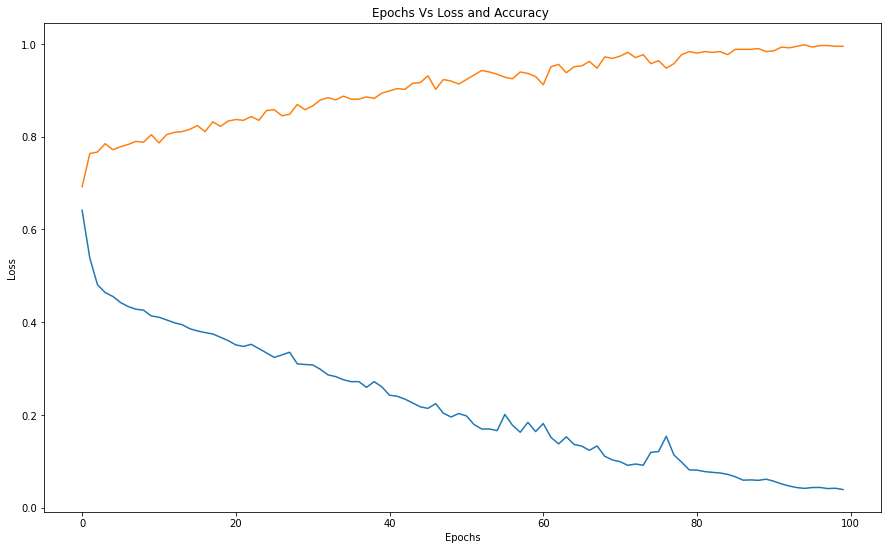

In [36]:
plt.figure(figsize=(15,9))
plt.plot(history.loss,label='Loss')
plt.plot(history.accuracy,label='Accuracy')
plt.title('Epochs Vs Loss and Accuracy ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [37]:
# As here we can see Accuracy is increasing and Loss is decreasing 